**Importing Libraries** 

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

**Data preprocessing** 

Training Image Preprocessing 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6899 files belonging to 80 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6899 files belonging to 80 classes.


In [4]:
training_set 

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 80), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break 

tf.Tensor(
[[[[ 60.014404  61.014404  56.014404]
   [ 62.15625   63.15625   58.15625 ]
   [ 63.867188  64.86719   59.867188]
   ...
   [125.9314   105.9314    98.9314  ]
   [122.08594  102.08594   95.08594 ]
   [118.863525  99.863525  95.09009 ]]

  [[ 41.631104  40.631104  36.631104]
   [ 63.542236  62.542236  58.542236]
   [ 64.39331   63.39331   59.39331 ]
   ...
   [123.60425  103.60425   96.60425 ]
   [122.078125 102.078125  95.078125]
   [117.74219   98.484375  92.22656 ]]

  [[ 87.35669   82.35669   79.35669 ]
   [ 69.99219   64.99219   61.992188]
   [ 77.67749   72.67749   69.67749 ]
   ...
   [122.       102.        95.      ]
   [120.36987  100.36987   93.36987 ]
   [114.27515   92.048584  85.79077 ]]

  ...

  [[133.854    113.854004 102.854004]
   [134.81567  114.815674 103.815674]
   [164.50708  144.50708  133.50708 ]
   ...
   [117.9624   104.095215  88.38428 ]
   [116.559814 106.78638   97.78638 ]
   [168.33691  161.33691  151.85254 ]]

  [[164.68945  142.5686   128.7055

**Building Model**

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 

In [7]:
model = Sequential()

**Building Convolution Layer**

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\nishu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) #to avoid overfitting 

In [14]:
model.add(Flatten()) 

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
model.add(Dense(units=80,activation='softmax'))

**Compiling the Model**

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │         120,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,905,804 (30.16 MB)

 Trainable params: 7,905,804 (30.16 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.7963 - loss: 0.6755 - val_accuracy: 0.9330 - val_loss: 0.2717
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8213 - loss: 0.5756 - val_accuracy: 0.9388 - val_loss: 0.2154
Epoch 3/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 5317s 25s/step - accuracy: 0.8358 - loss: 0.5163 - val_accuracy: 0.9701 - val_loss: 0.1256
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.8666 - loss: 0.4196 - val_accuracy: 0.9762 - val_loss: 0.0966
Epoch 5/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.8946 - loss: 0.3158 - val_accuracy: 0.9799 - val_loss: 0.0789
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.9132 - loss: 0.2680 - val_accuracy: 0.9771 - val_loss: 0.0859
Epoch 7/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.9157 - loss: 0.2671 - val_accuracy: 0.9828 - val_loss: 0.0642
Epoch 8/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9243 - loss: 0.2347 - val_ac

**Model Evaluation**

In [22]:
#model evaluation on training set 
train_loss,train_acc = model.evaluate(training_set)

216/216 ━━━━━━━━━━━━━━━━━━━━ 71s 327ms/step - accuracy: 0.9840 - loss: 0.0557


In [23]:
print(train_loss,train_acc)

0.04862063378095627 0.9868096709251404


In [24]:
#model evaluation on validation set 
val_loss,val_acc = model.evaluate(validation_set)

216/216 ━━━━━━━━━━━━━━━━━━━━ 69s 319ms/step - accuracy: 0.9847 - loss: 0.0518


In [25]:
print(val_loss,val_acc)

0.04862065240740776 0.9868096709251404


**Saving the model**


In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.8009856343269348,
  0.8296854496002197,
  0.8476590514183044,
  0.8756341338157654,
  0.9020147919654846,
  0.9139005541801453,
  0.9199883937835693,
  0.9253515005111694,
  0.9320191144943237,
  0.9423104524612427],
 'loss': [0.6494178175926208,
  0.5386300086975098,
  0.48611006140708923,
  0.4020951986312866,
  0.30705955624580383,
  0.27100303769111633,
  0.25453656911849976,
  0.23235712945461273,
  0.21032004058361053,
  0.18856628239154816],
 'val_accuracy': [0.9330337643623352,
  0.9388316869735718,
  0.9701405763626099,
  0.9762284159660339,
  0.9798521399497986,
  0.9770981073379517,
  0.9827511310577393,
  0.9701405763626099,
  0.9779677987098694,
  0.9868096709251404],
 'val_loss': [0.27170366048812866,
  0.21539351344108582,
  0.1256181001663208,
  0.09664343297481537,
  0.07892578840255737,
  0.08590491861104965,
  0.06415801495313644,
  0.10589335113763809,
  0.07952932268381119,
  0.04862063005566597]}

In [28]:
#Recording history in json 
import json 
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

**Accuracy Visulization**

In [29]:
training_history.history['accuracy']

[0.8009856343269348,
 0.8296854496002197,
 0.8476590514183044,
 0.8756341338157654,
 0.9020147919654846,
 0.9139005541801453,
 0.9199883937835693,
 0.9253515005111694,
 0.9320191144943237,
 0.9423104524612427]

In [30]:
training_history.history['val_accuracy']

[0.9330337643623352,
 0.9388316869735718,
 0.9701405763626099,
 0.9762284159660339,
 0.9798521399497986,
 0.9770981073379517,
 0.9827511310577393,
 0.9701405763626099,
 0.9779677987098694,
 0.9868096709251404]

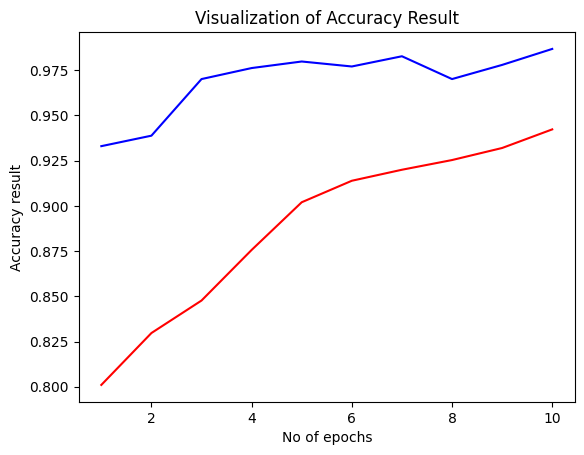

In [31]:
epochs = [i for i in range(1,11)]
epochs
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of Accuracy Result")
plt.show()

**Some other metrics**

In [32]:
class_name = validation_set.class_names
class_name

['Aloevera',
 'Amla',
 'Amruthaballi',
 'Arali',
 'Astma_weed',
 'Badipala',
 'Balloon_Vine',
 'Bamboo',
 'Beans',
 'Betel',
 'Bhrami',
 'Bringaraja',
 'Caricature',
 'Castor',
 'Catharanthus',
 'Chakte',
 'Chilly',
 'Citron lime (herelikai)',
 'Coffee',
 'Common rue(naagdalli)',
 'Coriender',
 'Curry',
 'Doddpathre',
 'Drumstick',
 'Ekka',
 'Eucalyptus',
 'Ganigale',
 'Ganike',
 'Gasagase',
 'Ginger',
 'Globe Amarnath',
 'Guava',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jackfruit',
 'Jasmine',
 'Kambajala',
 'Kasambruga',
 'Kohlrabi',
 'Lantana',
 'Lemon',
 'Lemongrass',
 'Malabar_Nut',
 'Malabar_Spinach',
 'Mango',
 'Marigold',
 'Mint',
 'Neem',
 'Nelavembu',
 'Nerale',
 'Nooni',
 'Onion',
 'Padri',
 'Palak(Spinach)',
 'Papaya',
 'Parijatha',
 'Pea',
 'Pepper',
 'Pomoegranate',
 'Pumpkin',
 'Raddish',
 'Rose',
 'Sampige',
 'Sapota',
 'Seethaashoka',
 'Seethapala',
 'Spinach1',
 'Tamarind',
 'Taro',
 'Tecoma',
 'Thumbe',
 'Tomato',
 'Tulsi',
 'Turmeric',
 'ashoka',
 'camphor',
 

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6899 files belonging to 80 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

216/216 ━━━━━━━━━━━━━━━━━━━━ 65s 299ms/step


(array([[1.0000000e+00, 0.0000000e+00, 5.4844721e-28, ..., 0.0000000e+00,
         1.4322358e-32, 8.4572504e-32],
        [9.9999988e-01, 4.7624500e-19, 9.3313776e-16, ..., 1.9644404e-18,
         1.0934110e-11, 1.7805247e-15],
        [9.9981314e-01, 8.2209111e-09, 3.1459703e-07, ..., 8.6087848e-10,
         1.0328594e-05, 4.8146054e-10],
        ...,
        [1.7284577e-06, 4.0392969e-09, 5.7329834e-07, ..., 1.0401923e-06,
         2.9006171e-07, 9.7402102e-01],
        [1.6761762e-09, 4.9100782e-07, 1.4480678e-07, ..., 1.9736835e-05,
         2.2616042e-04, 9.8163521e-01],
        [1.4472597e-08, 8.3016957e-08, 8.0235041e-05, ..., 9.6528674e-06,
         2.4067747e-06, 9.8721480e-01]], dtype=float32),
 (6899, 80))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(6899,), dtype=int64, numpy=array([ 0,  0,  0, ..., 79, 79, 79], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(6899, 80), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(6899,), dtype=int64, numpy=array([ 0,  0,  0, ..., 79, 79, 79], dtype=int64)>

In [42]:
from sklearn.metrics import classification_report 

In [43]:
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                         precision    recall  f1-score   support

               Aloevera       1.00      1.00      1.00       118
                   Amla       0.97      1.00      0.99        67
           Amruthaballi       1.00      0.99      0.99        90
                  Arali       1.00      1.00      1.00        89
             Astma_weed       0.95      0.99      0.97        82
               Badipala       1.00      0.97      0.99        76
           Balloon_Vine       1.00      0.97      0.98        61
                 Bamboo       0.97      0.97      0.97       118
                  Beans       0.95      1.00      0.97        97
                  Betel       0.99      1.00      1.00       114
                 Bhrami       0.99      0.98      0.99       104
             Bringaraja       0.96      1.00      0.98        73
             Caricature       1.00      1.00      1.00        76
                 Castor       1.00      0.99      1.00       129
           Catharanthus 

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(80, 80)

**Confusion matrix Visualization**

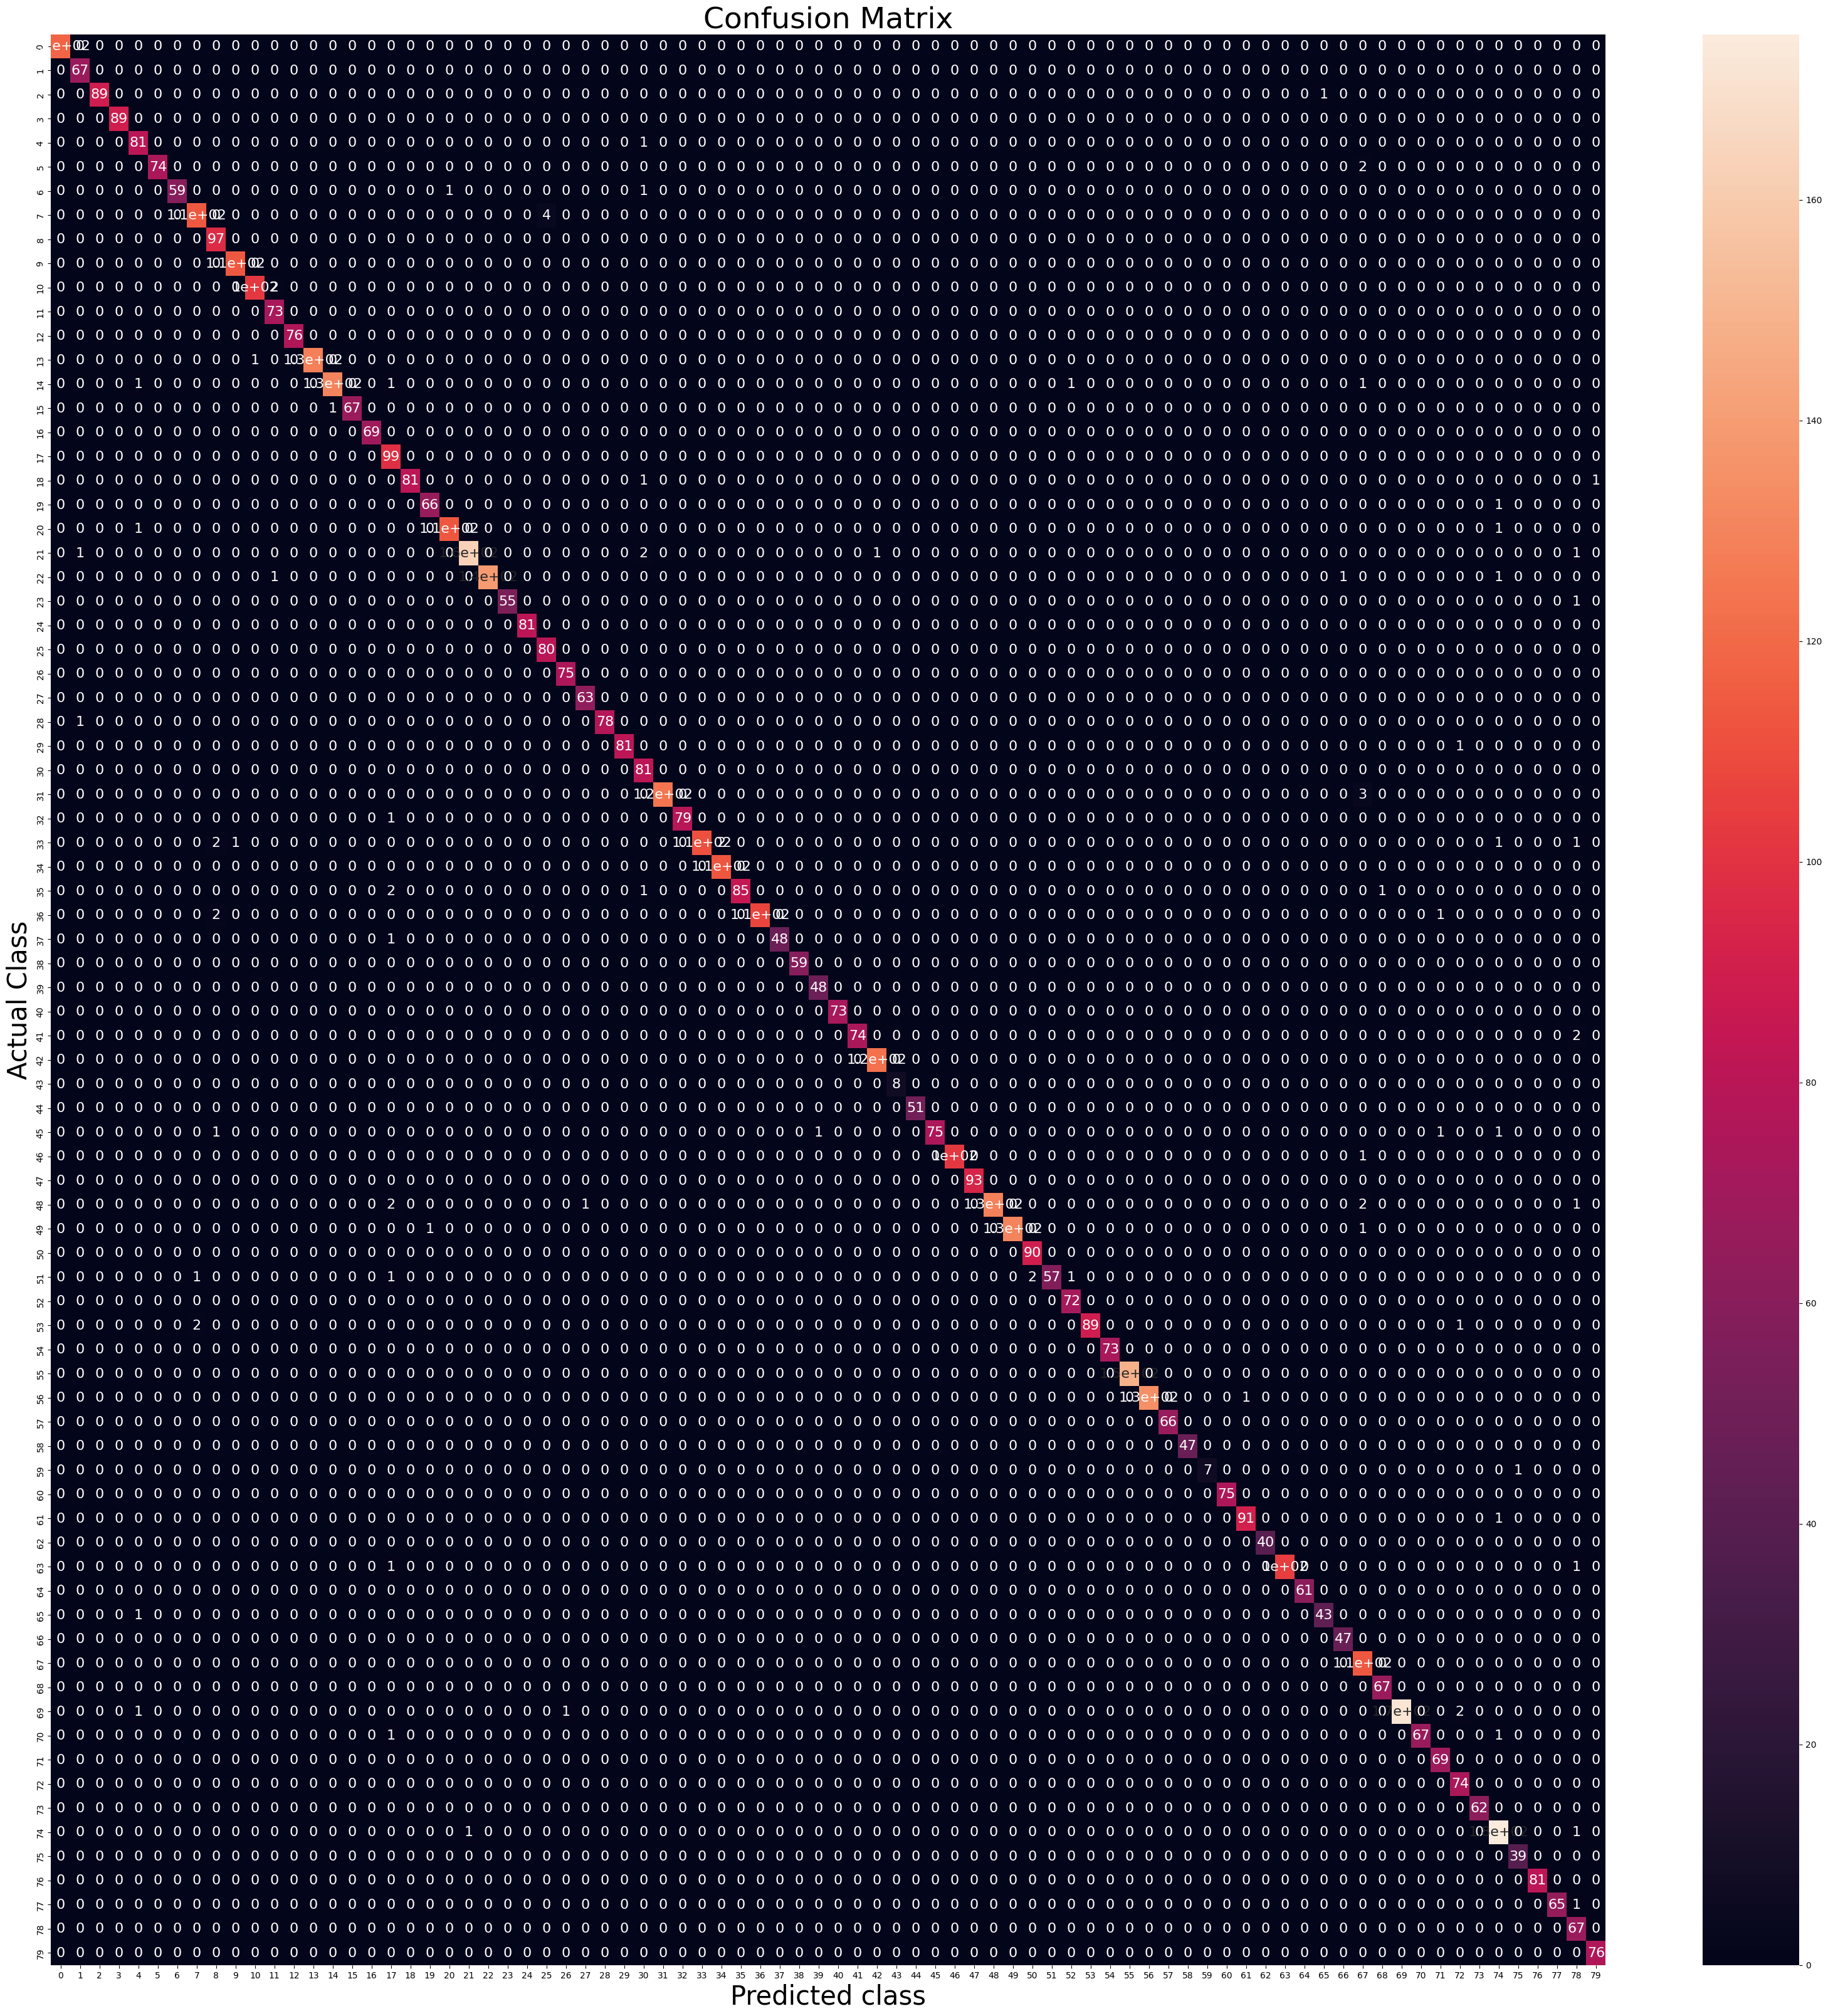

In [53]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':16})
plt.xlabel('Predicted class',fontsize=30)
plt.ylabel('Actual Class',fontsize=30)
plt.title('Confusion Matrix',fontsize=34)
plt.show()